In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

In [2]:
countries = ['CHN', 'KOR', 'JPN']
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'NE.CON.PRVT.CD': 'Household_Consumption',
    'NE.GDI.TOTL.CD': 'Gross_Investment',
    'NE.CON.GOVT.CD': 'Government_Spending',
    'NE.EXP.GNFS.CD': 'Exports',
    'NE.IMP.GNFS.CD': 'Imports'
}

all_data = {}
for indicator_code, indicator_name in indicators.items():
    data = wb.data.DataFrame(indicator_code, countries, time=range(1970, 2023))
    all_data[indicator_name] = data
    
combined_data = pd.concat(all_data, axis=1)

In [3]:
print("Data Information:")
print(combined_data.info())

print("\nData Sample:")
print(combined_data.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, CHN to KOR
Columns: 318 entries, ('GDP', 'YR1970') to ('Imports', 'YR2022')
dtypes: float64(318)
memory usage: 7.5+ KB
None

Data Sample:
                  GDP                                                          \
               YR1970        YR1971        YR1972        YR1973        YR1974   
economy                                                                         
CHN      9.260263e+10  9.980059e+10  1.136893e+11  1.385432e+11  1.441890e+11   
JPN      2.172237e+11  2.453641e+11  3.249338e+11  4.414606e+11  4.900358e+11   
KOR      9.005145e+09  9.903571e+09  1.086221e+10  1.387647e+10  1.954397e+10   

                                                                               \
               YR1975        YR1976        YR1977        YR1978        YR1979   
economy                                                                         
CHN      1.634295e+11  1.539393e+11  1.749359e+11  1.49540

In [4]:
print(combined_data.columns)


MultiIndex([(    'GDP', 'YR1970'),
            (    'GDP', 'YR1971'),
            (    'GDP', 'YR1972'),
            (    'GDP', 'YR1973'),
            (    'GDP', 'YR1974'),
            (    'GDP', 'YR1975'),
            (    'GDP', 'YR1976'),
            (    'GDP', 'YR1977'),
            (    'GDP', 'YR1978'),
            (    'GDP', 'YR1979'),
            ...
            ('Imports', 'YR2013'),
            ('Imports', 'YR2014'),
            ('Imports', 'YR2015'),
            ('Imports', 'YR2016'),
            ('Imports', 'YR2017'),
            ('Imports', 'YR2018'),
            ('Imports', 'YR2019'),
            ('Imports', 'YR2020'),
            ('Imports', 'YR2021'),
            ('Imports', 'YR2022')],
           length=318)


In [5]:
print("Data Type:")
print(combined_data.dtypes)

print("\nData Summary:")
print(combined_data.describe())

Data Type:
GDP      YR1970    float64
         YR1971    float64
         YR1972    float64
         YR1973    float64
         YR1974    float64
                    ...   
Imports  YR2018    float64
         YR2019    float64
         YR2020    float64
         YR2021    float64
         YR2022    float64
Length: 318, dtype: object

Data Summary:
                GDP                                                          \
             YR1970        YR1971        YR1972        YR1973        YR1974   
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   1.062771e+11  1.183561e+11  1.498285e+11  1.979601e+11  2.179229e+11   
std    1.047806e+11  1.188219e+11  1.601243e+11  2.198973e+11  2.437584e+11   
min    9.005145e+09  9.903571e+09  1.086221e+10  1.387647e+10  1.954397e+10   
25%    5.080389e+10  5.485208e+10  6.227576e+10  7.620982e+10  8.186647e+10   
50%    9.260263e+10  9.980059e+10  1.136893e+11  1.385432e+11  1.441890e+11   
75%    1.549131e+1

In [6]:
# Data Cleaning
# Check missing values

combined_data.isnull().sum()

GDP      YR1970    0
         YR1971    0
         YR1972    0
         YR1973    0
         YR1974    0
                  ..
Imports  YR2018    0
         YR2019    0
         YR2020    0
         YR2021    0
         YR2022    0
Length: 318, dtype: int64

In [7]:
# check duplicated data

combined_data.duplicated().sum()

0

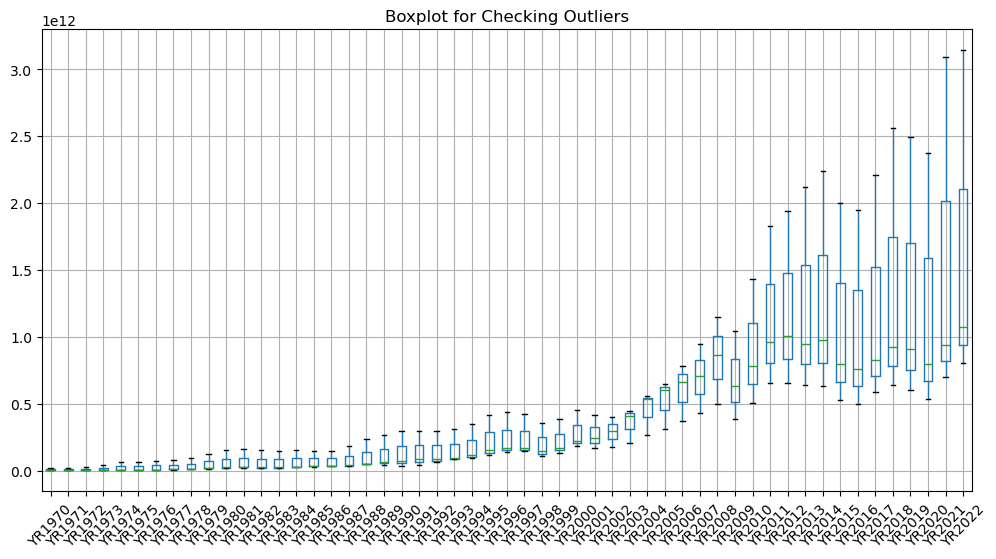


Number of Outliers:
YR1970    0
YR1971    0
YR1972    0
YR1973    0
YR1974    0
YR1975    0
YR1976    0
YR1977    0
YR1978    0
YR1979    0
YR1980    0
YR1981    0
YR1982    0
YR1983    0
YR1984    0
YR1985    0
YR1986    0
YR1987    0
YR1988    0
YR1989    0
YR1990    0
YR1991    0
YR1992    0
YR1993    0
YR1994    0
YR1995    0
YR1996    0
YR1997    0
YR1998    0
YR1999    0
YR2000    0
YR2001    0
YR2002    0
YR2003    0
YR2004    0
YR2005    0
YR2006    0
YR2007    0
YR2008    0
YR2009    0
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
YR2015    0
YR2016    0
YR2017    0
YR2018    0
YR2019    0
YR2020    0
YR2021    0
YR2022    0
dtype: int64


In [8]:
# check outliers

# Boxplot
plt.figure(figsize=(12, 6))
data.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Boxplot for Checking Outliers")
plt.xticks(rotation=45)
plt.show()

# IQR Method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print("\nNumber of Outliers:")
print(outliers.sum())

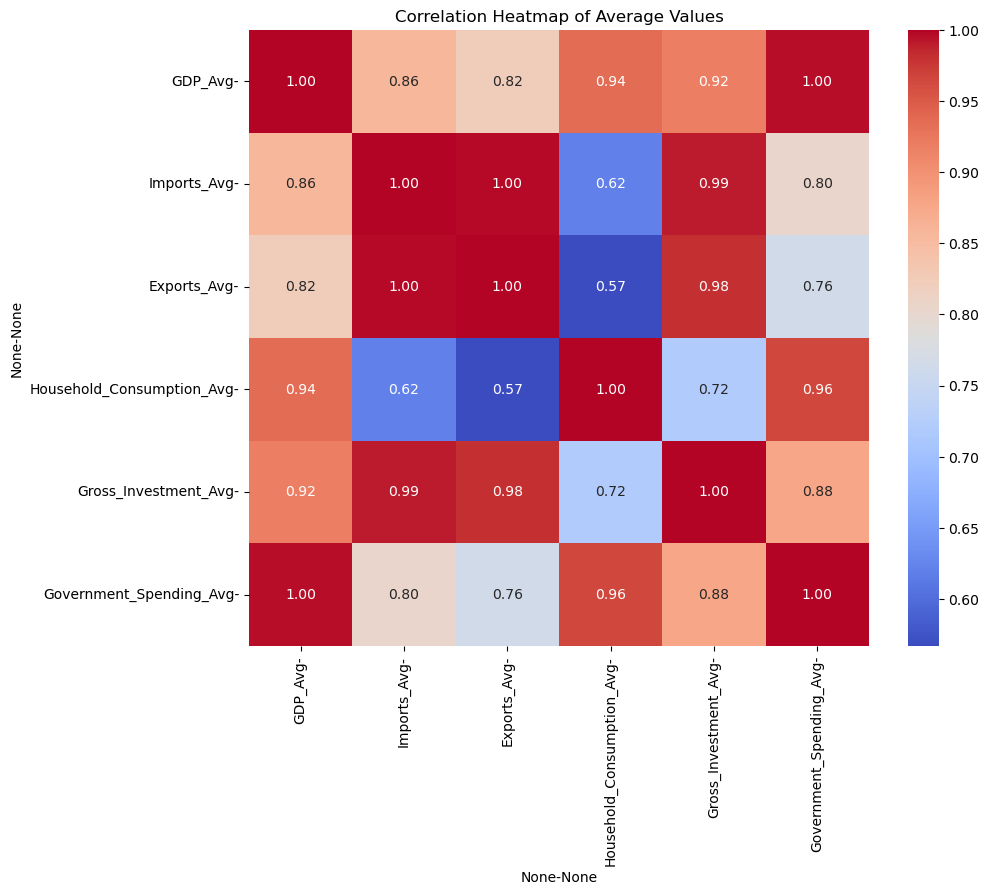

In [9]:
combined_data['GDP_Avg'] = combined_data.filter(like='GDP').mean(axis=1)
combined_data['Imports_Avg'] = combined_data.filter(like='Imports').mean(axis=1)
combined_data['Exports_Avg'] = combined_data.filter(like='Exports').mean(axis=1)
combined_data['Household_Consumption_Avg'] = combined_data.filter(like='Household_Consumption').mean(axis=1)
combined_data['Gross_Investment_Avg'] = combined_data.filter(like='Gross_Investment').mean(axis=1)
combined_data['Government_Spending_Avg'] = combined_data.filter(like='Government_Spending').mean(axis=1)

avg_columns = [
    'GDP_Avg', 'Imports_Avg', 'Exports_Avg',
    'Household_Consumption_Avg', 'Gross_Investment_Avg', 'Government_Spending_Avg'
]

correlation_matrix = combined_data[avg_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Average Values")
plt.show()


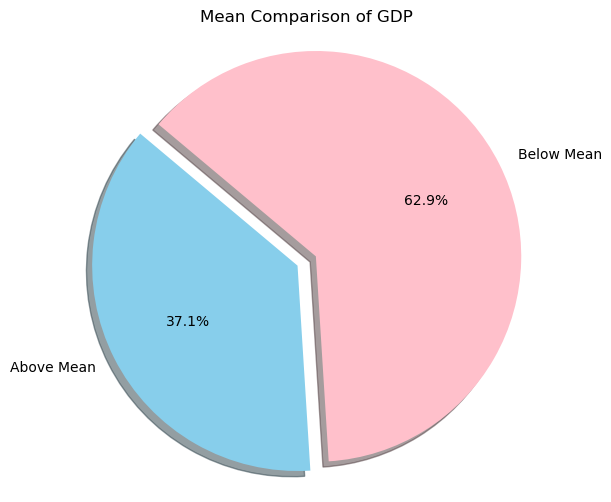

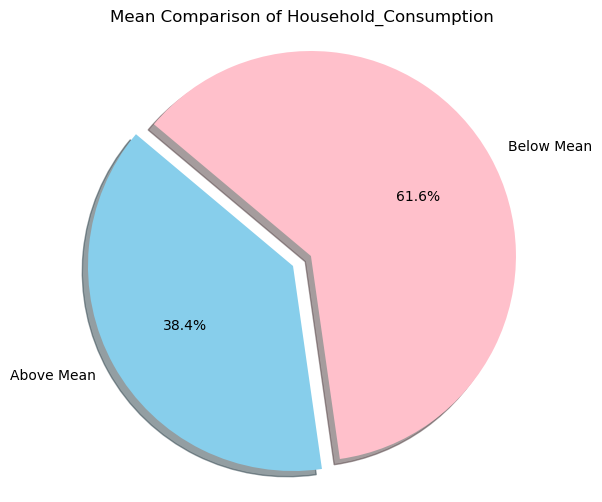

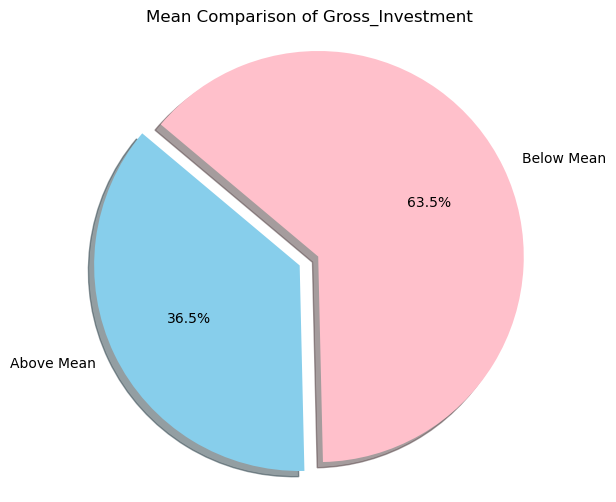

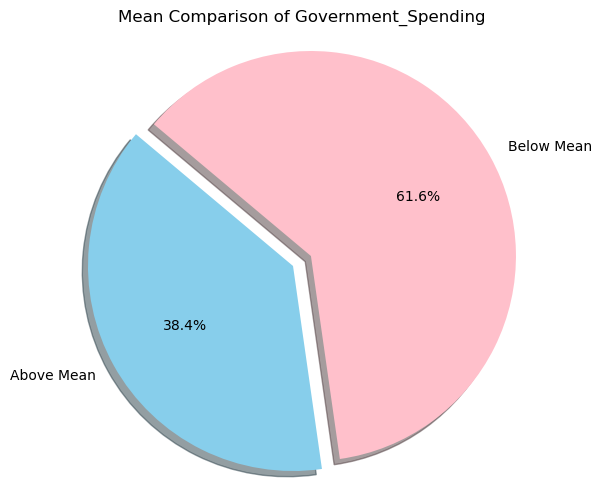

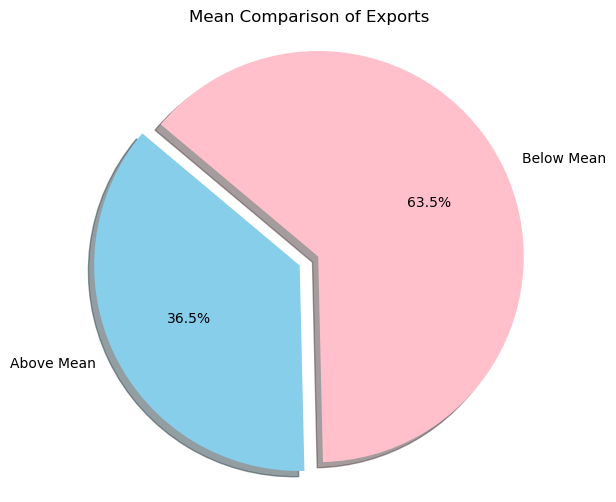

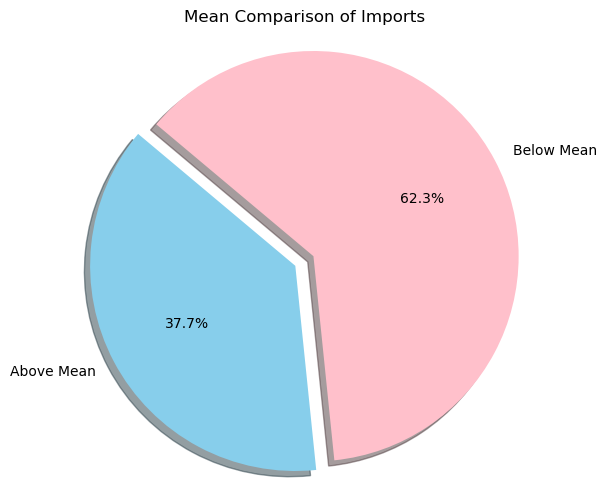

In [10]:
# pie chart for each indicator

for indicator in indicators.values():
    above_mean = (combined_data[indicator] >= combined_data[indicator].mean()).sum().sum()
    below_mean = (combined_data[indicator] < combined_data[indicator].mean()).sum().sum()

    labels = ['Above Mean', 'Below Mean']
    sizes = [above_mean, below_mean]
    colors = ['skyblue', 'pink']
    explode = (0.1, 0)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"Mean Comparison of {indicator}")
    plt.axis('equal')
    plt.show()

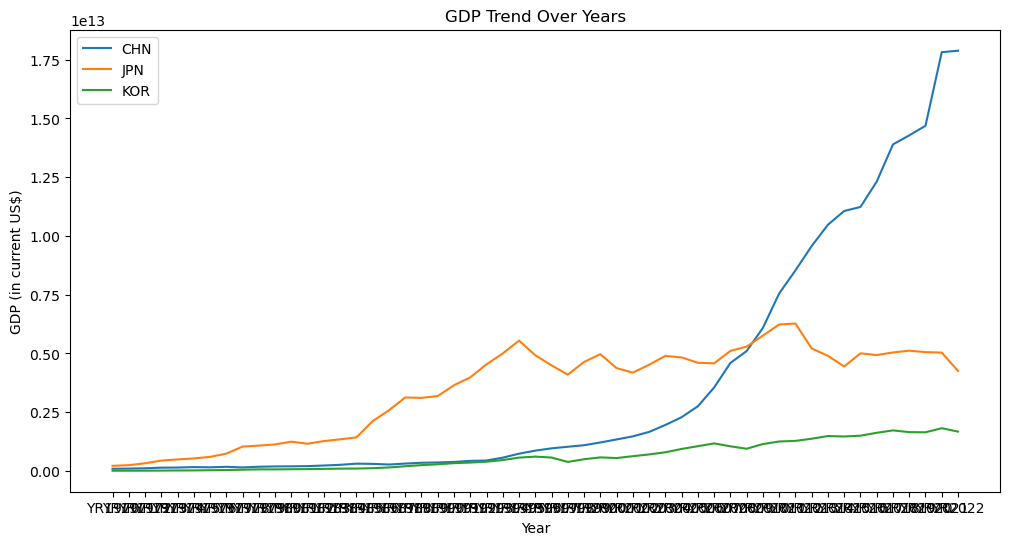

In [11]:
# GDP trend over years

plt.figure(figsize=(12, 6))
for country in ['CHN', 'JPN', 'KOR']:
    plt.plot(combined_data.loc[country, 'GDP'], label=country)
plt.title("GDP Trend Over Years")
plt.xlabel("Year")
plt.ylabel("GDP (in current US$)")
plt.legend()
plt.show()

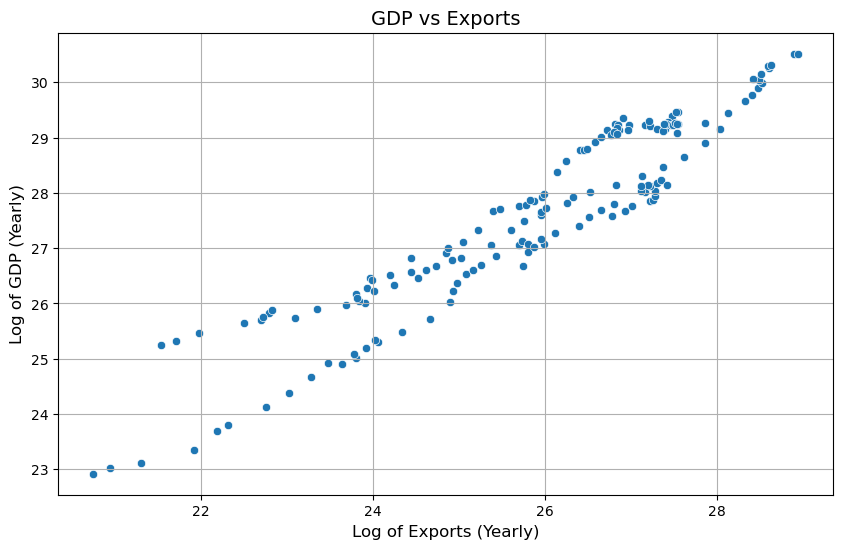

In [12]:
combined_data.columns = ['_'.join(map(str, col)) if isinstance(col, tuple) else col for col in combined_data.columns]

gdp_data = combined_data.filter(like='GDP_')
exports_data = combined_data.filter(like='Exports_')

gdp_data.columns = [col.split('_')[1] for col in gdp_data.columns]
exports_data.columns = [col.split('_')[1] for col in exports_data.columns]

gdp_data = gdp_data.T.reset_index()
gdp_data.columns = ['Year'] + [f'Country_{i}' for i in range(1, gdp_data.shape[1])]

exports_data = exports_data.T.reset_index()
exports_data.columns = ['Year'] + [f'Country_{i}' for i in range(1, exports_data.shape[1])]

gdp_data = gdp_data[~gdp_data['Year'].str.contains('Avg|Total')]
exports_data = exports_data[~exports_data['Year'].str.contains('Avg|Total')]

gdp_data_long = gdp_data.melt(id_vars='Year', var_name='Country', value_name='GDP')
exports_data_long = exports_data.melt(id_vars='Year', var_name='Country', value_name='Exports')

yearly_data = pd.merge(gdp_data_long, exports_data_long, on=['Year', 'Country'])

yearly_data['GDP_Log'] = np.log1p(yearly_data['GDP'])
yearly_data['Exports_Log'] = np.log1p(yearly_data['Exports'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exports_Log', y='GDP_Log', data=yearly_data)
plt.title("GDP vs Exports", fontsize=14)
plt.xlabel("Log of Exports (Yearly)", fontsize=12)
plt.ylabel("Log of GDP (Yearly)", fontsize=12)
plt.grid(True)
plt.show()

## ARIMA MODEL

Number of missing values: 0
1970-01-01    9.005145e+09
1971-01-01    9.903571e+09
1972-01-01    1.086221e+10
1973-01-01    1.387647e+10
1974-01-01    1.954397e+10
Name: KOR, dtype: float64
Original Log GDP ADF Statistic: -3.8680779699574015 p-value: 0.002282748435262252


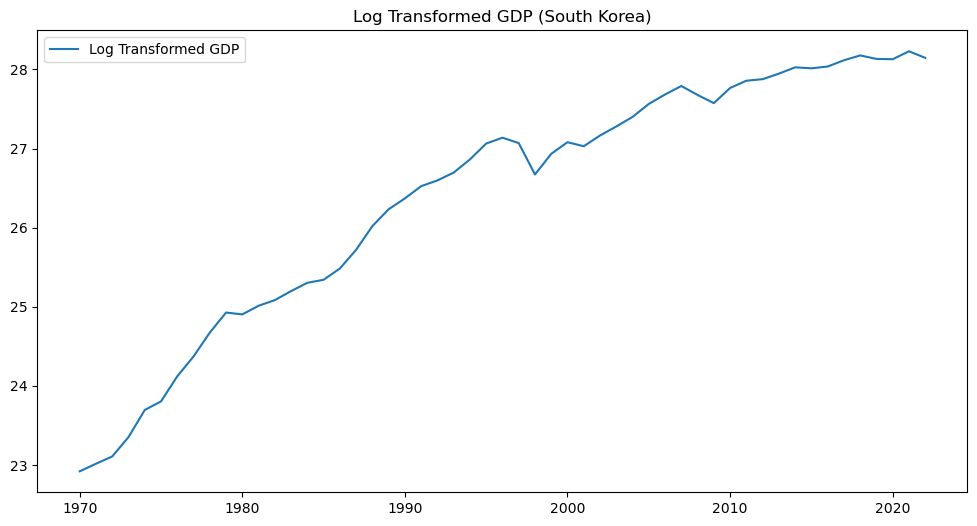

In [14]:
import arima_model 

KOR_GDP_log = arima_model.process_gdp_data(combined_data)  
arima_model.adf_test(KOR_GDP_log)  



<Figure size 1200x600 with 0 Axes>

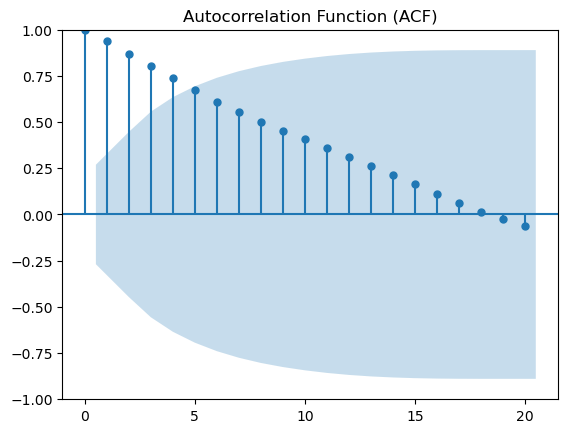

<Figure size 1200x600 with 0 Axes>

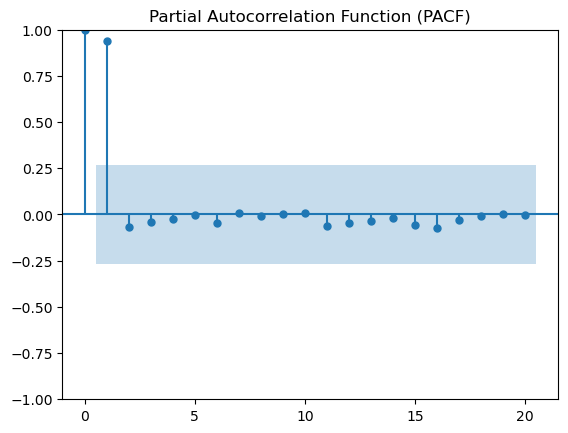

In [38]:
import acf_pacf_plot

stationary_series = KOR_GDP_log
acf_pacf_plot.plot_acf_pacf(stationary_series)



In [16]:
from statsmodels.tsa.arima.model import ARIMA
KOR_GDP_log = KOR_GDP_log.asfreq('YS')


arima_model = ARIMA(KOR_GDP_log, order=(2, 0, 0))
arima_result = arima_model.fit()

print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                    KOR   No. Observations:                   53
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  28.346
Date:                Wed, 29 Jan 2025   AIC                            -48.692
Time:                        20:30:36   BIC                            -40.811
Sample:                    01-01-1970   HQIC                           -45.661
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5944      2.076     12.330      0.000      21.526      29.663
ar.L1          1.5601      0.128     12.233      0.000       1.310       1.810
ar.L2         -0.5637      0.120     -4.689      0.0

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  1.448942   0.999086


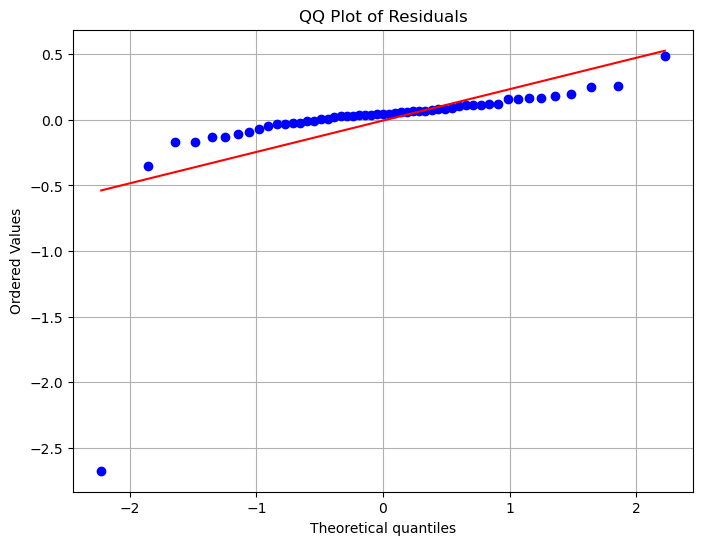

In [40]:
import residual_analysis

residual_analysis.analyze_residuals(arima_result)


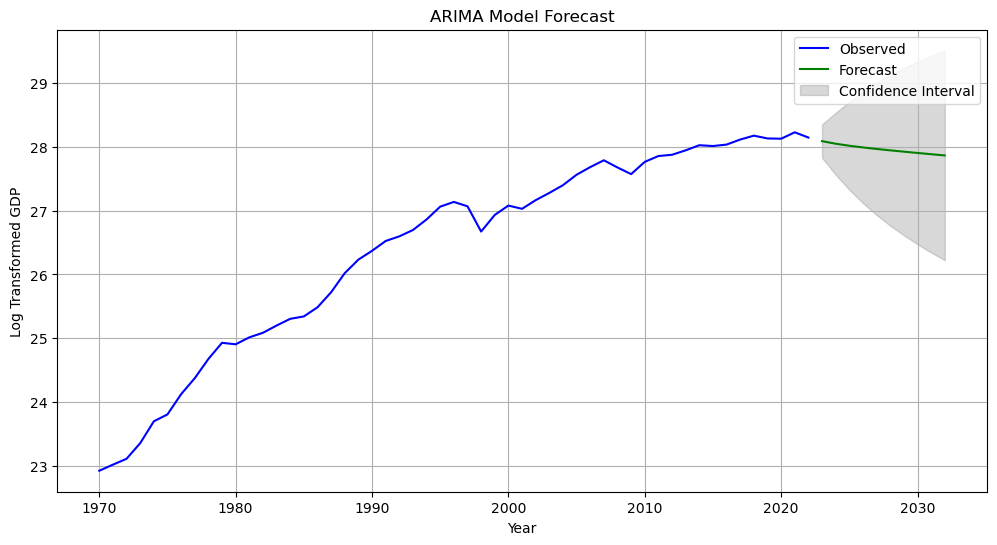

In [42]:
import forecast_plot

forecast_plot.plot_forecast(arima_result, stationary_series, forecast_steps=10)


